In [1]:
import numpy as np
import pandas as pd

import matplotlib.ticker as ticker
from matplotlib import cm

import matplotlib.pyplot as plt

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

import sys
import os

cdir = os.getcwd() #get current directory
os.chdir(cdir) #make sure you are in the current directory

#mother directory (i.e. one folder 'above')
mother_dir = os.path.abspath(os.path.join(cdir, os.pardir))
#verify  mother directory
print(f"Mother directory {mother_dir} given")

#get the path to the py directory
py_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'py'))
#add the py directory to the system path
if py_dir not in sys.path:
    sys.path.append(py_dir)

#verify the directory has been added
print(f"Added {py_dir} to sys.path")
print(f"System path: {sys.path}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Mother directory /Users/ronja/Documents/GitHub/gradient-model given
Added /Users/ronja/Documents/GitHub/gradient-model/py to sys.path
System path: ['/Users/ronja/opt/anaconda3/lib/python39.zip', '/Users/ronja/opt/anaconda3/lib/python3.9', '/Users/ronja/opt/anaconda3/lib/python3.9/lib-dynload', '', '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages', '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/aeosa', '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/setuptools/_vendor', '/

In [2]:
#Import necesarry functions from python-scripts of py-folder

#package to individually set parameters
from params import setParams

In [3]:
from integration import run

# With H-currents

In [4]:
ee, ii = -0.3, -0.3
params={'I_e': ee, 'I_i': ii, 'b': -0.4, 'end_t': 20*1000, 'beta_a': -10,
        'length': 200, 'n': 500,
        'seed': True, 'seed_func': 'prng', 'seed_amp': 0.5}

ee1, ii1 = -0.6, -1.1
params_adaps = {'I_e': ee1, 'I_i': ii1, 'b': -0.4, 'end_t': 20*1000, 'beta_a': -10, 
        'length': 200, 'n': 500,
        'seed': True, 'seed_func': 'prng', 'seed_amp': 0.5}

ee2, ii2 = -0.6, -1.1
params_h = {'I_e': ee2, 'I_i': ii2, 'b': -0.8, 'end_t': 20*1000, 'beta_a': -10, 
        'length': 200, 'n': 500,
        'seed': True, 'seed_func': 'prng', 'seed_amp': 0.5}

params = setParams(params)

In [5]:
#without mechanism
ue, ui, adaps = run(params)

In [6]:
#without mechanism
ue_adaps, ui_adaps, adaps = run(params_adaps)

In [7]:
#without mechanism
ue_h, ui_h, adaps = run(params_h)

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_19094/2623169751.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=time_labels, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_19094/2623169751.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=space_labels, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_19094/2623169751.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=time_labels, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_19094/2623169751.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLo

Text(0, 0.5, 'x $[ \\mu m]$')

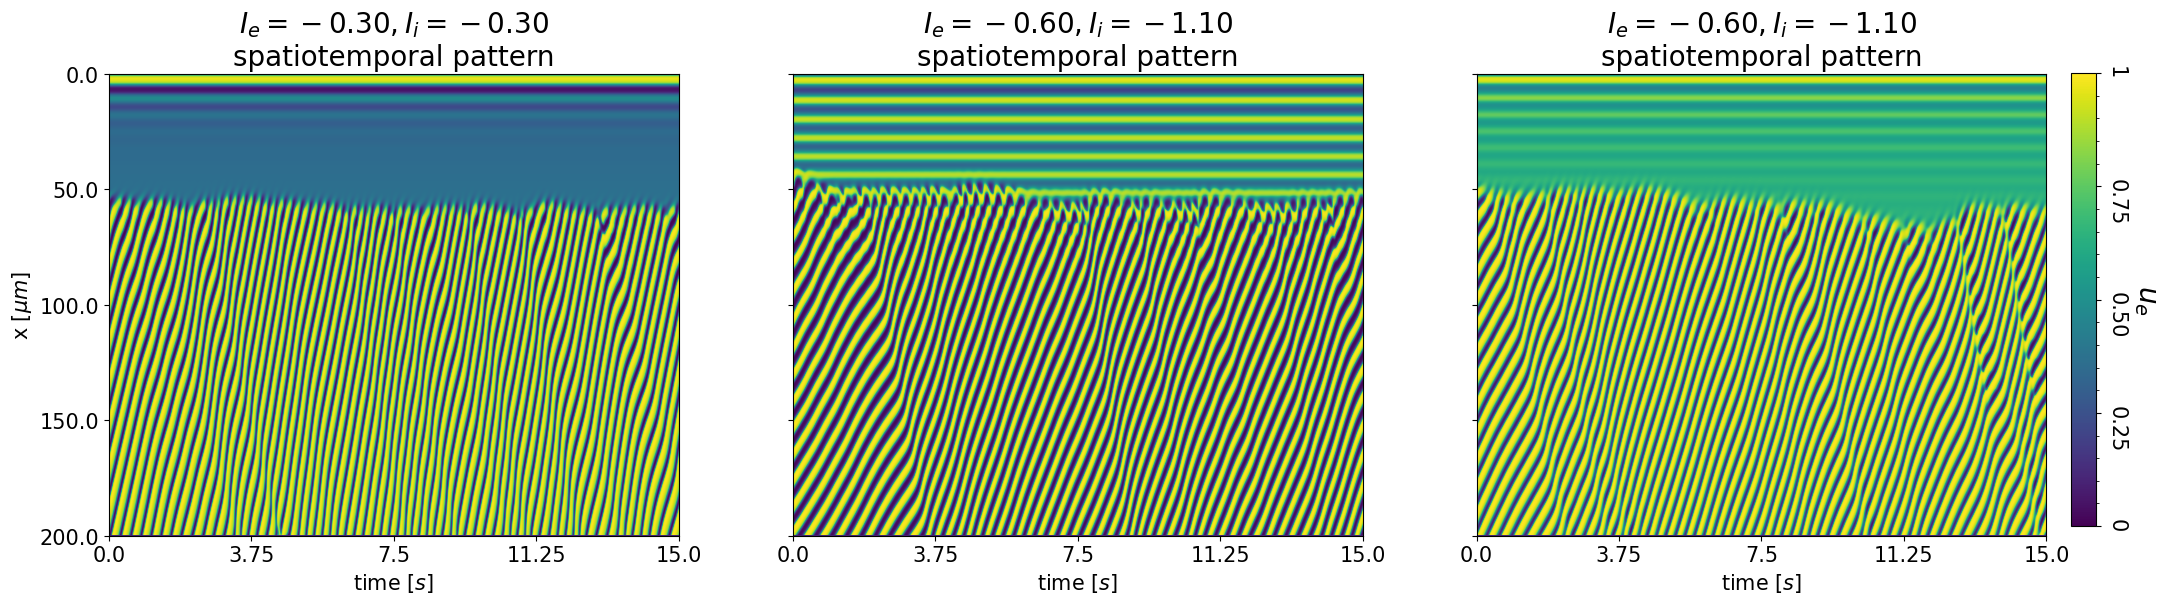

In [9]:
#get all parameters into the params-dict 
#to be able to call also the paramameters we didn't specifically define
params = setParams(params)
tfs = 20
fs = 15

#visualize randomly initialized next to init in fp
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(25,6), sharey='all')

duration = 15
until = 0.1
vmin, vmax = 0, 1

#plot the corresponding activites
time_labels = np.linspace(0,duration,5)
space_labels = np.linspace(0, params.length, 5)

titles = [r'$I_e=%.2f, I_i=%.2f$' %(ee,ii) + '\n' + 'spatiotemporal pattern', 
          r'$I_e=%.2f, I_i=%.2f$' %(ee1,ii1) + '\n' + 'spatiotemporal pattern', 
          r'$I_e=%.2f, I_i=%.2f$' %(ee2,ii2) + '\n' + 'spatiotemporal pattern']

ax0.imshow(ue.T[:,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')
ax1.imshow(ue_adaps.T[:,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')
pos = ax2.imshow(ue_h.T[:,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')


cbar_ticks = np.linspace(vmin, vmax,5)
cbar_labels = np.array(['0'])
cbar_labels2 = ['%.2f' %f for f in cbar_ticks[1:-1]]
cbar_labels = np.append(cbar_labels, cbar_labels2)
cbar_labels = np.append(cbar_labels, ['1'])
cb_ax = fig.add_axes([.91,.126,.01,.755])
cbar = ax0.figure.colorbar(pos, ax=ax2, ticks=cbar_ticks, cax=cb_ax)
cbar.ax.set_ylabel(r'$u_e$', rotation=-90, va="bottom", fontsize=tfs)
cbar.ax.set_yticklabels(cbar_labels, rotation=-90, fontsize=fs)
cbar.minorticks_on()

for idx, ax in enumerate([ax0, ax1, ax2]):
    ax.set_title(titles[idx], fontsize=tfs)
    ax.set_xlabel('time '+ r'$[s]$', fontsize=fs)
    ax.xaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_xticklabels(labels=time_labels, fontsize=fs)
    ax.yaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_yticklabels(labels=space_labels, fontsize=fs)
    
ax0.set_ylabel('x ' + r'$[ \mu m]$', fontsize=fs)

# With Adaptation

In [18]:
ee, ii = -0.3, -1.4
params={'I_e': ee, 'I_i': ii, 'b': 0.4, 'end_t': 20*1000, 'beta_a': 10,
        'length': 200, 'n': 500,
        'seed': True, 'seed_func': 'prng', 'seed_amp': 0.5}

ee1, ii1 = -0.4, -1.
params_adaps = {'I_e': ee1, 'I_i': ii1, 'b': 0.4, 'end_t': 20*1000, 'beta_a': 10, 
        'length': 200, 'n': 500,
        'seed': True, 'seed_func': 'prng', 'seed_amp': 0.5}

ee2, ii2 = -0.4, -1.
params_h = {'I_e': ee2, 'I_i': ii2, 'b': 0.8, 'end_t': 20*1000, 'beta_a': 10, 
        'length': 200, 'n': 500,
        'seed': True, 'seed_func': 'prng', 'seed_amp': 0.5}

params = setParams(params)

In [19]:
#without mechanism
ue, _, _ = run(params)

In [12]:
#without mechanism
ue_adaps, _, _ = run(params_adaps)

In [13]:
#without mechanism
ue_h, _, _ = run(params_h)

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_19094/1694950684.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=time_labels, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_19094/1694950684.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=space_labels, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_19094/1694950684.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=time_labels, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_19094/1694950684.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLo

Text(0, 0.5, 'x $[ \\mu m]$')

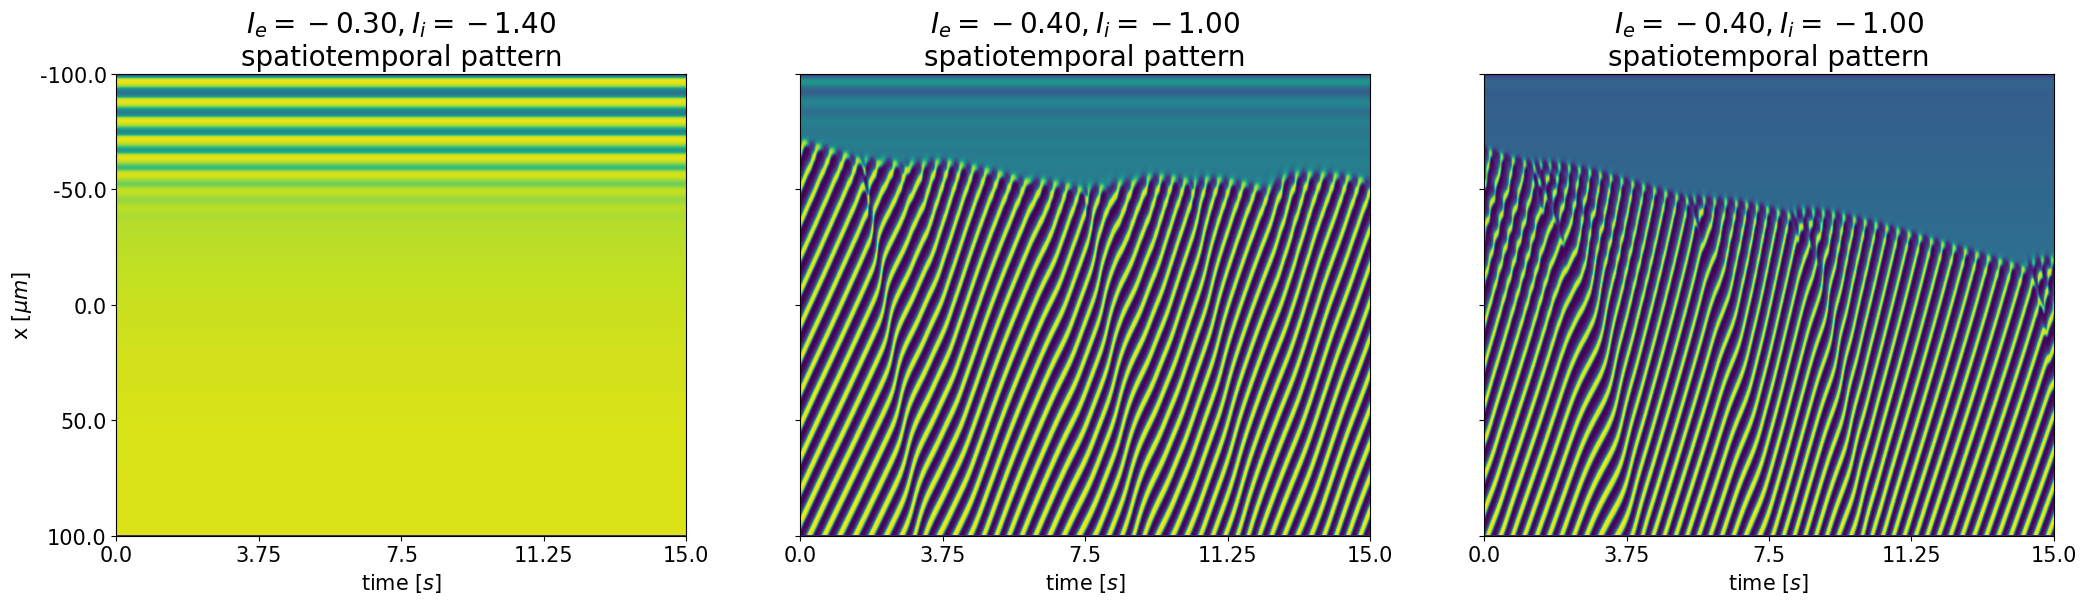

In [20]:
#get all parameters into the params-dict 
#to be able to call also the paramameters we didn't specifically define
params = setParams(params)
tfs = 20
fs = 15

#visualize randomly initialized next to init in fp
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(25,6), sharey='all')

duration = 15
until = 0.1
vmin, vmax = 0, 1

#plot the corresponding activites
time_labels = np.linspace(0,duration,5)
space_labels = np.linspace(-params.length/2, params.length/2, 5)

titles = [r'$I_e=%.2f, I_i=%.2f$' %(ee,ii) + '\n' + 'spatiotemporal pattern', 
          r'$I_e=%.2f, I_i=%.2f$' %(ee1,ii1) + '\n' + 'spatiotemporal pattern', 
          r'$I_e=%.2f, I_i=%.2f$' %(ee2,ii2) + '\n' + 'spatiotemporal pattern']

ax0.imshow(ue.T[:,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')
ax1.imshow(ue_adaps.T[:,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')
pos = ax2.imshow(ue_h.T[:,-int(duration*1000*(1/params.dt)):-int(until*1000*(1/params.dt))], vmin=0, vmax=1, aspect='auto')

for idx, ax in enumerate([ax0, ax1, ax2]):
    ax.set_title(titles[idx], fontsize=tfs)
    ax.set_xlabel('time '+ r'$[s]$', fontsize=fs)
    ax.xaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_xticklabels(labels=time_labels, fontsize=fs)
    ax.yaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_yticklabels(labels=space_labels, fontsize=fs)
    
ax0.set_ylabel('x ' + r'$[ \mu m]$', fontsize=fs)